![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

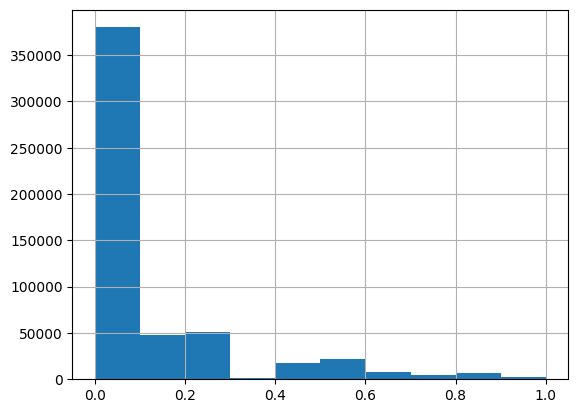

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
vect1 = CountVectorizer(lowercase=False,stop_words='english', max_features=100)
Xp1 = vect1.fit_transform(X_train)
Xp1.shape

# Implementación Modelo Random Forest
modeloRF = RandomForestRegressor(n_estimators=1, random_state=42)
modeloRF.fit(Xp1, y_train)

predict_RF = modeloRF.predict(vect1.transform(X_test))

MSE_rf1= metrics.mean_squared_error(y_test, predict_RF)

print('\n')
print('El MSE para el modelo de Random Forest es: ' + str(MSE_rf1))



El MSE para el modelo de Random Forest es: 0.06178090167429519


**Punto 1 - Tokenización con CountVectorizer**

Primero se realizó el preprocesamiento del texto convirtiendo todos los caracteres a minúsculas; de igual forma, se utilizo el parámetro "stop_words" ya que el texto se encuentra en inglés por lo que hay varios problemas conocidos con este idioma. Lo que realiza este parámetro es que hay palabras que se consideran vacías, que son palabras como “and”, “him”, “the”, que no se consideran como informativas al representar el contenido de un texto y que pueden eliminarse para evitar que se interpreten como una señal de predicción. Finalmente, se utilizo el parámetro "max_features" para seleccionar las primeras 100 palabras con mayor frecuencia del texto y así poder lograr un tiempo más corto en la ejecución del código.

Posteriormente, se ópto por entrenar un algortimo de Random Forest para regresión con el cual se obtuvo un MSE de 0.0617 el cual es bastante bajo e indica que el modelo tiene un buen rendimiento.



## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vec2 = CountVectorizer(lowercase=False, ngram_range=(1, 3), stop_words='english', max_features=100)
Xp2 = vec2.fit_transform(X_train)
Xp2.shape

# Implementación Modelo Random Forest
modeloRF2 = RandomForestRegressor(n_estimators=1, random_state=42)
modeloRF2.fit(Xp2, y_train)
predict_RF2 = modeloRF2.predict(vec2.transform(X_test))

MSE_rf2= metrics.mean_squared_error(y_test, predict_RF2)
print('\n')
print('El MSE para el modelo de Random Forest considerando trigramas es: ' + str(MSE_rf2))



El MSE para el modelo de Random Forest considerando trigramas es: 0.06178090167429519


**Punto 2 - Tokenización con CountVectorizer y trigramas**

Primero se realizó el mismo preprocesamiento que se utilizo en el punto 1, sin embargo, en este caso se consideraron trigramas para preprocesar los comentarios. Es válido aclarar que los trigramas son conjuntos de 3 palabras, por lo cual se utilizo el parámetro "ngram_range" para definir conjuntos de 1 a 3 palabras.

Posteriormente, igual que en el punto anterior, se entrenó un algortimo de Random Forest para regresión con el cual se obtuvo en este caso un MSE de 0.0617 el cual es bastante bajo e indica que el modelo tiene un buen rendimiento.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**Punto 3 - TfidfVectorizer**

*Contexto*

Como se menciono en los puntos anteriores, en textos largos se encuentran palabras comunes como 'the', 'a', 'is' de forma muy frecuente. Se presume que estas palabras no contienen mucho contexto sobre la oración, sin embargo, son frecuentes y debido a esto puede opacar el impacto de palabras menos frecuentes que ofrecen más contexto, por ejemplo 'philosophy', 'cooking', 'accident'.

*Descripción y Funcionamiento*

La función TfidfVectorizer tiene como objetivo reducir el impacto de las palabras frecuentes con poco contexto para que aquellas que ofrecen más contexto sean representadas en los modelos. Para conseguir esto, la función **multiplica** la **frecuencia por término** (obtenida de CountVectorizer) por **la frecuencia por documento inversa**. Convierte una colección de documentos en bruto en una matriz de características TF-IDF,  la cual se utiliza en la minería de texto para calcular la frecuencia de las palabras en un documento y determinar su importancia en función de cuántas veces aparecen en otros documentos.

Primero se calcula la **frecuencia por término**, también conocida como el número de veces que una palabra aparece en un documento, dividido por el número total de palabras en ese documento. Luego se calcula la **frecuencia por documento inversa** como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico. Mide la importancia/relevancia, también denominado peso, de un término en un conjunto de documentos.

La frecuencia por documento inversa se obtiene con la siguiente ecuación:

$$idf\left(t\right) = log\left( \frac{1+n}{1+df\left (t\right )} \right ) + 1$$

En donde n es el número total de textos en el corpus y df(t) es el número de documentos que contienen la palabra t.

Finalmente, la función TfidfVectorizer nos devuelve una matriz normalizada de la forma

$$ TfidfVectorizer\left ( t,d \right ) = CountVectorizer\left ( t,d \right ) * idf\left ( t \right ) $$

**El producto de ambos valores nos da una métrica que nos permite saber cómo de únicas y relevantes son las palabras de un documento.**

*Ventajas*

Si se compara la función de TfidfVectorizer con CountVectorizer una de las principales ventajas de la primera es que CountVectorizer cuenta la frecuencia de las palabras y esto puede generar un sesgo a favor de las palabras con mayor frecuencia e ignora las palabras "raras" que permitirían procesar los datos de mejor manera; mientras que TfidfVectorizer considera el peso total de la palabra en los documentos y penaliza las palabras más frecuentes. Además, TfidVectorizer se diferencia de CountVectorizer en que éste pondera aquellas palabras que aparecen mucho en un documento pero no en muchos documentos.

Sin embargo, es importante mencionar que CountVectorizer puedo llegar a lo mismo pero debo trabajar mucho mas y usar técnicas como stop_words, etc, por lo que TfidfVectorizer ofrece una gran ventaja en comparación.


**Fuentes:**


*   https://jbmoreno.es/blog/tf-idf-seo/
*   https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
*   https://medium.com/@sergiodana/tfidvectorizer-versus-countvectorizer-diferencias-10202f0e4fe0
*   https://kiwosan.com/seo/tf-idf/#:~:text=Tf%2Didf%20(Term%20frequency%20%2D,un%20documento%20en%20una%20colecci%C3%B3n.





## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vec4 = TfidfVectorizer(lowercase=False, stop_words='english', max_features=100)
Xp4 = vec4.fit_transform(X_train)
Xp4.shape

# Implementación Modelo Random Forest
modeloRF4 = RandomForestRegressor(n_estimators=1, random_state=42)
modeloRF4.fit(Xp4, y_train)
predict_RF4 = modeloRF4.predict(vec4.transform(X_test))

MSE_rf4= metrics.mean_squared_error(y_test, predict_RF4)
print('\n')
print('El MSE para el modelo de Random Forest usando la funcion TfidfVectorizer: ' + str(MSE_rf4))



El MSE para el modelo de Random Forest usando la funcion TfidfVectorizer: 0.05776360636136363


**Punto 4 - Tokenización con TfidfVectorizer**

De acuerdo a lo explicado en el punto anterior, se realizó el mismo preprocesamiento que se utilizo en el punto 2, sin embargo, se utilizó la función TfidfVectorizer debido a las ventajas que proporciona en comparación con la función CountVectorizer.

Posteriormente, igual que en el punto 2, se entrenó un algortimo de Random Forest para regresión con el cual se obtuvo en este caso un MSE de 0.0577 el cual es bastante bajo e indica que el modelo tiene un buen rendimiento.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

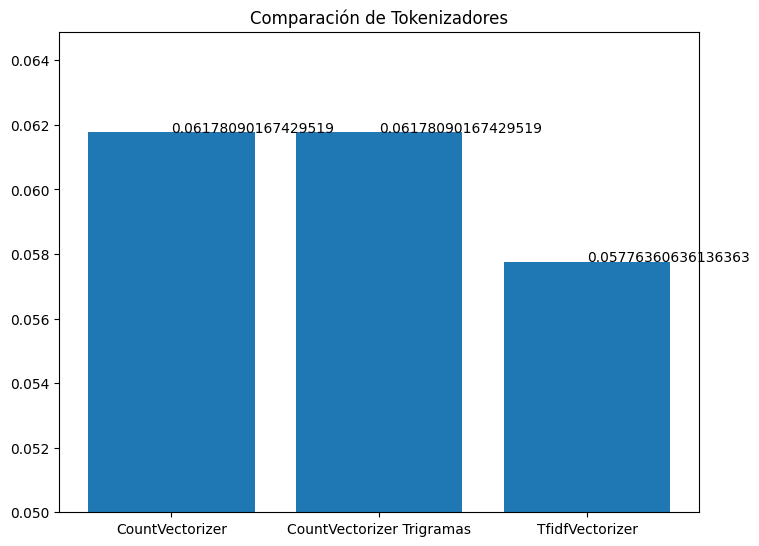

In [ ]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Tokenizadores")
ejeX = ['CountVectorizer','CountVectorizer Trigramas' ,'TfidfVectorizer']
ejeY = [MSE_rf1,MSE_rf2,MSE_rf4]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0.05)
plt.show()

**Punto 5 - Comparación y análisis de resultados**

Una vez calculamos la métrica del MSE para cada uno de los puntos, es posible evidenciar que los diferentes tokenizadores tienen un desempeño similar, sin embargo vemos que al utilizar la función TfidfVectorizer está ofrece un mejor desempeño que los modelos donde se utilizó la función CountVectorizer. Justamente con esto muy problablemente se genera debido a esas diferencias y ventajas que ofrece una función sobre la otra. La diferencia más grande que se puede estar presentando en los modelos es que los 2 primeros a pesar de usar el parámetro "stop_words" igual pueden estar considerando palabras que tienen mucha ocurrencia pero poco contexto o importancia dentro del texto.